In [6]:
pip install seaborn

**Hastalıklı veya Sağlıklı Hasta Sınıflandırması**

Model Karşılaştırma Sonuçları:
                            Model  Doğruluk  Precision    Recall  F1-Score
0              Lojistik Regresyon     0.525   0.428571  0.166667      0.24
1  Destek Vektör Makineleri (SVM)     0.550   1.000000  0.000000      0.00
2                   Random Forest     0.475   0.411765  0.388889      0.40


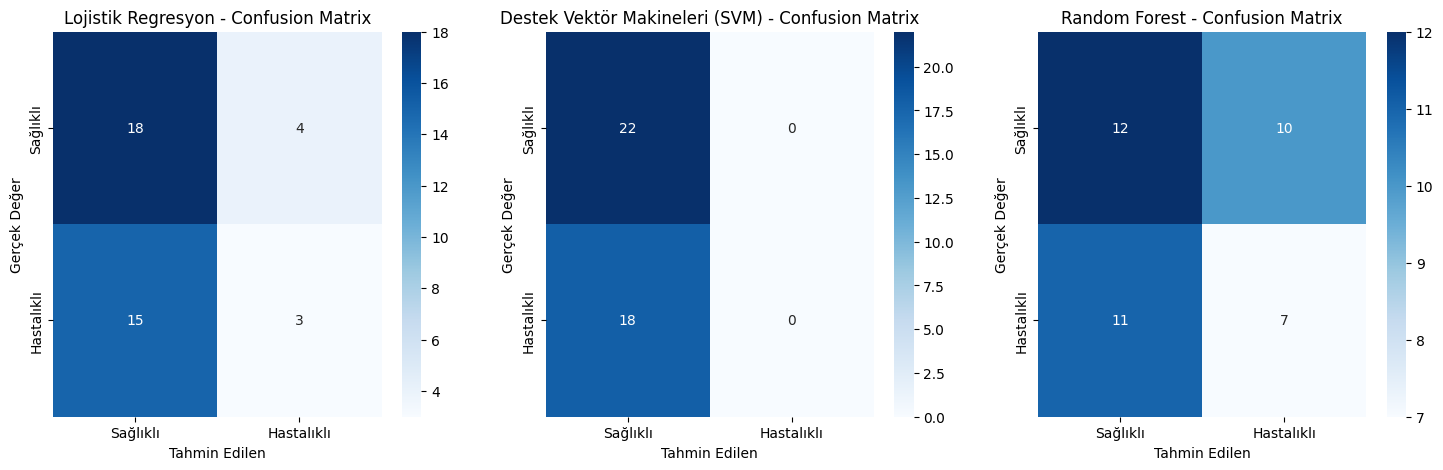

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1: Hastalıklı, 0: Sağlıklı
np.random.seed(42)
data_size = 200

patient_data = {
    "Age": np.random.randint(20, 80, data_size),
    "Blood_Pressure": np.random.randint(80, 180, data_size),
    "Cholesterol": np.random.randint(100, 300, data_size),
    "BMI": np.random.uniform(18.5, 40.0, data_size),
    "Glucose": np.random.randint(70, 200, data_size),
    "Disease": np.random.randint(0, 2, data_size)
}

df_patients = pd.DataFrame(patient_data)


X = df_patients.drop(columns=["Disease"])
y = df_patients["Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Lojistik Regresyon": LogisticRegression(),
    "Destek Vektör Makineleri (SVM)": SVC(kernel="linear", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


results = []
conf_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([model_name, accuracy, precision, recall, f1])


    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)


results_df = pd.DataFrame(results, columns=["Model", "Doğruluk", "Precision", "Recall", "F1-Score"])
print("Model Karşılaştırma Sonuçları:")
print(results_df)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sağlıklı", "Hastalıklı"],
                yticklabels=["Sağlıklı", "Hastalıklı"], ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Tahmin Edilen")
    axes[i].set_ylabel("Gerçek Değer")

plt.show()


**K-Means ile Müşteri Segmentasyonu**

In [8]:
pip install matplotlib

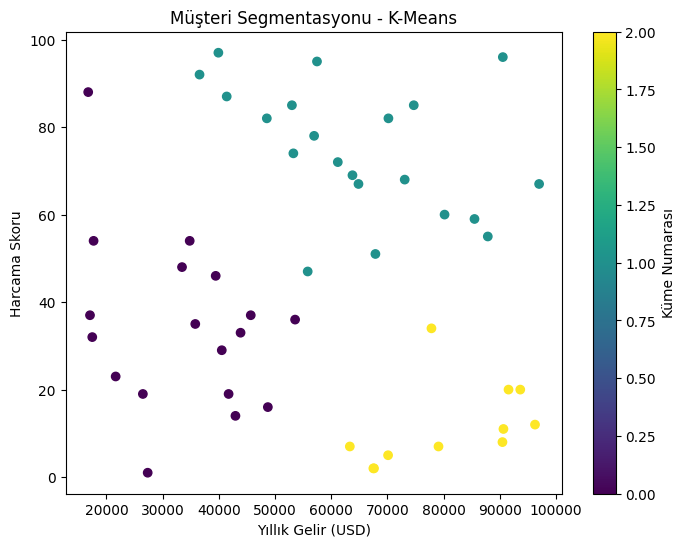

   Customer_ID  Annual_Income  Spending_Score  Cluster
0            1          85480              59        1
1            2          61163              72        1
2            3          34816              54        0
3            4          64840              67        1
4            5          67853              51        1
5            6          39917              97        1
6            7          36566              92        1
7            8          90452               8        2
8            9          77823              34        2
9           10          35806              35        0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = {
    "Customer_ID": range(1, 51),
    "Annual_Income": np.random.randint(15000, 100000, 50),
    "Spending_Score": np.random.randint(1, 100, 50)
}

df_customers = pd.DataFrame(customer_data)


scaler = StandardScaler()
X_customers = scaler.fit_transform(df_customers[['Annual_Income', 'Spending_Score']])

# K-Means Modeli
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_customers["Cluster"] = kmeans.fit_predict(X_customers)


plt.figure(figsize=(8, 6))
plt.scatter(df_customers["Annual_Income"], df_customers["Spending_Score"], c=df_customers["Cluster"], cmap="viridis")
plt.xlabel("Yıllık Gelir (USD)")
plt.ylabel("Harcama Skoru")
plt.title("Müşteri Segmentasyonu - K-Means")
plt.colorbar(label="Küme Numarası")
plt.show()

print(df_customers.head(10))

**Doğrusal Regresyon ile Ev Fiyat Tahmini**

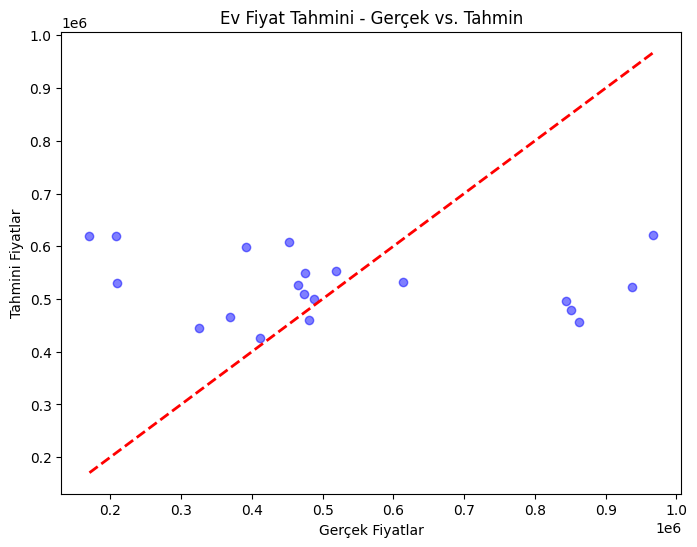

 Model Performans Ölçütleri:
Mean Absolute Error (MAE): 198778.29
Mean Squared Error (MSE): 64930466863.03
Root Mean Squared Error (RMSE): 254814.57
R² Score: -0.15

 İlk 10 Ev İçin Tahmin Sonuçları:
   Metrekare  Oda_Sayisi   Fiyat  Tahmini_Fiyat
0        152           5  325281  444987.193825
1        229           1  737147  591006.948349
2        142           1  998613  610634.529158
3         64           1  494070  628231.670573
4        156           1  452228  607476.067878
5        121           4  531839  492828.752406
6        238           3  369536  507280.863174
7         70           3  417824  545182.398529
8        152           1  357426  608378.485387
9        171           3  277789  522396.356440


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


np.random.seed(42)
house_data = {
    "Metrekare": np.random.randint(50, 250, 100),
    "Oda_Sayisi": np.random.randint(1, 6, 100),
    "Fiyat": np.random.randint(100000, 1000000, 100)
}

df_houses = pd.DataFrame(house_data)


X_houses = df_houses[["Metrekare", "Oda_Sayisi"]]
y_houses = df_houses["Fiyat"]

# (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_houses, y_houses, test_size=0.2, random_state=42)


linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

df_houses["Tahmini_Fiyat"] = linear_reg_model.predict(X_houses)


y_pred_test = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmini Fiyatlar")
plt.title("Ev Fiyat Tahmini - Gerçek vs. Tahmin")
plt.show()


print(" Model Performans Ölçütleri:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


print("\n İlk 10 Ev İçin Tahmin Sonuçları:")
print(df_houses.head(10))

**Makine Öğrenemesi ile Doğal Dil İşleme Örnekleri**



1.Adlandırılmış Varlık Tanıma (NER)



In [11]:
import spacy


nlp = spacy.load("en_core_web_sm")


text = "Elon Musk is the CEO of Tesla and SpaceX. He was born in South Africa."


doc = nlp(text)


print("Named Entities in the text:")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")


Named Entities in the text:
Elon Musk (PERSON)
Tesla (ORG)
South Africa (GPE)




2.Metin Sınıflandırma (Spam Tespiti)



In [15]:
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


def preprocess_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = re.sub(r'\d+', '', text)  # Sayıları kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))  # Noktalama işaretlerini kaldır
    tokens = nltk.word_tokenize(text)  # Tokenizasyon
    tokens = [word for word in tokens if word not in stop_words]  # Stopwords çıkar
    return " ".join(tokens)


spam_data = {
    "text": [
        "Congratulations! You've won a free vacation to Bahamas. Click now!",
        "URGENT: Your account has been compromised, reset your password!",
        "Hey, let's catch up for coffee tomorrow?",
        "Limited time offer! Buy one, get one free on all products.",
        "Can you send me the project files?",
        "Win a brand new iPhone! Click here to claim your prize!",
        "Reminder: Your subscription expires tomorrow. Renew now!",
        "Meeting at 3 PM. Please confirm your availability.",
        "Free Bitcoin giveaway! Don't miss out!",
        "Dinner at my place tonight? Let me know."
    ],
    "label": [1, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # 1: Spam, 0: Not Spam
}

df = pd.DataFrame(spam_data)
df['processed_text'] = df['text'].apply(preprocess_text)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


print("Naïve Bayes Spam Sınıflandırma Sonuçları:")
print(f"Doğruluk: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Naïve Bayes Spam Sınıflandırma Sonuçları:
Doğruluk: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

<b> Çözüm Önerileri </b>
<p> Daha büyük bir veri seti kullanın </p>
<p> Hazır bir SMS spam veri seti ekleyin </p>
<p> Rastgele bölünmeyi dengeli hale getirin </p>
<p> TF-IDF için min_df ve max_df ayarlarını optimize edin </p>

Güncellenmiş Versiyon :

In [16]:
import pandas as pd
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


spam_data = {
    "text": [
        "Congratulations! You've won a free vacation to Bahamas. Click now!",
        "URGENT: Your account has been compromised, reset your password!",
        "Hey, let's catch up for coffee tomorrow?",
        "Limited time offer! Buy one, get one free on all products.",
        "Can you send me the project files?",
        "Win a brand new iPhone! Click here to claim your prize!",
        "Reminder: Your subscription expires tomorrow. Renew now!",
        "Meeting at 3 PM. Please confirm your availability.",
        "Free Bitcoin giveaway! Don't miss out!",
        "Dinner at my place tonight? Let me know.",
        "You've been selected to receive a $500 gift card! Click the link below.",
        "Your loan has been pre-approved! Apply now to get instant cash.",
        "Hey John, can we schedule a meeting next week?",
        "Claim your exclusive discount coupon now before it expires!",
        "Your package is waiting for delivery confirmation. Click here!",
        "Hope you are doing well, let's have a quick call later.",
        "This limited-time investment opportunity can make you rich!",
        "Congratulations, you won a free flight ticket!",
        "Hey, are you free this weekend to hang out?",
        "Claim your lottery prize now! It's free and easy.",
        "Can you review the report and send feedback?",
        "Join our premium membership and get exclusive deals.",
        "Warning: Your PayPal account has been temporarily locked!",
        "Get 50% off on all items for the next 24 hours. Hurry up!",
        "Remember to bring the documents for the presentation.",
        "Congratulations! You have been randomly selected for a gift!",
        "I'm sending you the project updates now.",
        "Buy now and get free shipping on all orders!",
        "Please find attached the invoice for your reference.",
        "This is your last chance to claim your free reward!",
        "We are offering free samples for a limited time. Get yours now!",
        "The agenda for tomorrow's meeting has been finalized.",
        "You just received an encrypted message. Click to read now.",
        "Huge discounts available for a short period. Don’t miss out!",
        "Can you please send me the updated version of the document?",
        "Final notice: Your car warranty is about to expire.",
        "Thank you for your purchase! Your order has been confirmed.",
        "Your email has won a free lottery ticket. Claim it today!",
        "Please review the attached files before our meeting.",
        "You have received a mystery prize! Click to reveal your reward.",
        "This is an automated message regarding your credit score update.",
        "Let's discuss the proposal over lunch tomorrow.",
        "Special reward for our valued customers! Click here to claim.",
        "Important: Your Apple ID has been locked for security reasons.",
        "Your order is ready for pickup at your nearest store.",
        "Don't miss out on this once-in-a-lifetime investment opportunity!",
        "Just wanted to check in and see how you're doing.",
        "You have a new friend request pending. Accept now!",
        "Confirm your email address to receive a surprise gift!",
        "The latest updates on the project are now available."
    ],
    "label": [
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 0
    ]
}

df = pd.DataFrame(spam_data)
df['processed_text'] = df['text'].apply(preprocess_text)


vectorizer = TfidfVectorizer(min_df=1, max_df=0.9, stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)


print(" **Güncellenmiş Naïve Bayes Spam Sınıflandırma Sonuçları:**")
print(f"✅ **Doğruluk:** {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


 **Güncellenmiş Naïve Bayes Spam Sınıflandırma Sonuçları:**
✅ **Doğruluk:** 0.53
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.57      0.89      0.70         9

    accuracy                           0.53        15
   macro avg       0.29      0.44      0.35        15
weighted avg       0.34      0.53      0.42        15



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




3.Duygu Analizi



In [17]:
from sklearn.linear_model import LogisticRegression


sentiment_data = {
    "text": [
        "I absolutely love this movie! Best film ever.",
        "This product is terrible, I regret buying it.",
        "The service was okay, not the best but not the worst.",
        "Absolutely fantastic experience, highly recommend it!",
        "The food was awful, I'm very disappointed.",
        "This was a great book, I enjoyed reading it.",
        "Worst customer service ever. Never coming back!",
        "The laptop is fast, lightweight, and has great battery life.",
        "Horrible experience. Will never use this again.",
        "Pretty decent movie, had some good moments."
    ],
    "label": [1, 0, 0, 1, 0, 1, 0, 1, 0, 1]
}

df_sentiment = pd.DataFrame(sentiment_data)
df_sentiment['processed_text'] = df_sentiment['text'].apply(preprocess_text)


X_sent = vectorizer.fit_transform(df_sentiment['processed_text'])
y_sent = df_sentiment['label']


X_train, X_test, y_train, y_test = train_test_split(X_sent, y_sent, test_size=0.3, random_state=42)

# Lojistik Regresyon modeli eğitme
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


print("Lojistik Regresyon Duygu Analizi Sonuçları:")
print(f"Doğruluk: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Lojistik Regresyon Duygu Analizi Sonuçları:
Doğruluk: 0.33
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




4.Metin Kümeleme




In [18]:
from sklearn.cluster import KMeans


text_clustering_data = [
    "The stock market is experiencing significant growth.",
    "Economic downturns often lead to stock price drops.",
    "The latest AI model achieves state-of-the-art accuracy.",
    "New breakthroughs in deep learning improve image recognition.",
    "The economy is recovering after a period of decline."
]

df_cluster = pd.DataFrame(text_clustering_data, columns=["text"])
df_cluster['processed_text'] = df_cluster['text'].apply(preprocess_text)

X_cluster = vectorizer.fit_transform(df_cluster['processed_text'])

# K-Means ile kümeleme
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_cluster)

print(df_cluster)

                                                text  \
0  The stock market is experiencing significant g...   
1  Economic downturns often lead to stock price d...   
2  The latest AI model achieves state-of-the-art ...   
3  New breakthroughs in deep learning improve ima...   
4  The economy is recovering after a period of de...   

                                      processed_text  cluster  
0       stock market experiencing significant growth        0  
1    economic downturns often lead stock price drops        0  
2    latest ai model achieves stateoftheart accuracy        0  
3  new breakthroughs deep learning improve image ...        0  
4                  economy recovering period decline        1  




5. Metin Özetleme



In [19]:
pip install networkx

In [20]:
import nltk
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# nltk için cümle ayırıcıyı indir
nltk.download('punkt')


document = """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.
NLP is used to apply algorithms to identify and extract the natural language rules such that the unstructured language data is converted into a form that computers can understand.
It involves several challenges such as speech recognition, natural language understanding, and natural language generation."""


sentences = nltk.sent_tokenize(document)

# BoW (Bag of Words) vektörleştirme
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)


sim_matrix = cosine_similarity(X)

# Graph oluştur ve PageRank hesapla
nx_graph = nx.from_numpy_array(sim_matrix)
scores = nx.pagerank(nx_graph)


ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)


print("Özet:")
for i in range(2):  # En iyi 2 cümleyi seç
    print(ranked_sentences[i][1])

Özet:
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence.
It involves several challenges such as speech recognition, natural language understanding, and natural language generation.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




6.Metin Benzerliği Ölçümü



In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text_similarity_data = [
    "Artificial intelligence is transforming the world.",
    "Machine learning and AI are reshaping industries.",
    "Deep learning enables new AI applications.",
    "Stock market fluctuations impact global economy."
]

df_similarity = pd.DataFrame(text_similarity_data, columns=["text"])


vectorizer = TfidfVectorizer()
X_sim = vectorizer.fit_transform(df_similarity['text'])


similarity_matrix = cosine_similarity(X_sim)

print("Metin Benzerlik Matrisi:")
print(pd.DataFrame(similarity_matrix, columns=["T1", "T2", "T3", "T4"], index=["T1", "T2", "T3", "T4"]))


Metin Benzerlik Matrisi:
     T1        T2        T3   T4
T1  1.0  0.000000  0.000000  0.0
T2  0.0  1.000000  0.217288  0.0
T3  0.0  0.217288  1.000000  0.0
T4  0.0  0.000000  0.000000  1.0
